In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
TSLA = pdr.get_data_yahoo('TSLA')
day = np.arange(1,len(TSLA) + 1)

In [3]:
TSLA['day'] = day
TSLA = TSLA[['day','Open', 'High', 'Low','Close']]

In [4]:
TSLA.head()

,day,Open,High,Low,Close
Date,,,,,
2017-05-17,1,62.877998,62.925999,61.099998,61.222000
2017-05-18,2,61.400002,62.787998,61.062000,62.612000
2017-05-19,3,63.099998,63.299999,62.040001,62.166000
2017-05-22,4,62.560001,62.874001,61.360001,62.070000
2017-05-23,5,62.091999,62.146000,60.695999,60.771999


# Adding moving average to the dataframe

Signal creation => 
- Using moving average
- 2 moving averages: Slow and Fast
- Enter a trade when the fast MA goes above slow MA
- Clear the position and go short when fast goes below slow MA

In [5]:
TSLA['9-day'] = TSLA['Close'].rolling(9).mean().shift()
TSLA['21-day'] = TSLA['Close'].rolling(21).mean().shift()
#currently has look ahead information
#now lookahead is gone since we used the shift()


In [6]:
TSLA[19:25]

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2017-06-14,20,76.218002,76.849998,75.262001,76.132004,71.162666,NaN
2017-06-15,21,74.500000,75.092003,73.297997,75.068001,72.058000,NaN
2017-06-16,22,75.596001,75.601997,74.019997,74.279999,72.846667,67.912667
2017-06-19,23,75.000000,75.339996,73.559998,73.959999,73.381778,68.534476
2017-06-20,24,75.334000,75.776001,73.945999,74.447998,73.758445,69.074857
2017-06-21,25,74.870003,75.398003,73.603996,75.279999,74.038222,69.659714


In [7]:
TSLA['signal'] = np.where(TSLA['9-day']>TSLA['21-day'],1,0)
TSLA['signal'] = np.where(TSLA['9-day']<TSLA['21-day'],-1,TSLA['signal'])
TSLA.dropna(inplace=True)

In [8]:
TSLA.tail()

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2022-05-10,1255,819.309998,825.359985,774.250000,800.039978,880.070007,943.537147,-1
2022-05-11,1256,795.000000,809.770020,727.200012,734.000000,871.017782,932.801432,-1
2022-05-12,1257,701.000000,759.659973,680.000000,728.000000,855.072225,921.280956,-1
2022-05-13,1258,773.479980,787.349976,751.570007,769.590027,839.210002,908.950003,-1
2022-05-16,1259,767.159973,769.760010,719.088501,724.369995,824.393338,896.912862,-1


# Returns

In [9]:
TSLA['returns'] = np.log(TSLA['Close']).diff()
TSLA['system_return'] = TSLA['signal'] * TSLA['returns']
TSLA['entry'] = TSLA.signal.diff()

In [10]:
TSLA.head()

,day,Open,High,Low,Close,9-day,21-day,signal,returns,system_return,entry
Date,,,,,,,,,,,
2017-06-16,22,75.596001,75.601997,74.019997,74.279999,72.846667,67.912667,1,NaN,NaN,NaN
2017-06-19,23,75.000000,75.339996,73.559998,73.959999,73.381778,68.534476,1,-0.004317,-0.004317,0.0
2017-06-20,24,75.334000,75.776001,73.945999,74.447998,73.758445,69.074857,1,0.006576,0.006576,0.0
2017-06-21,25,74.870003,75.398003,73.603996,75.279999,74.038222,69.659714,1,0.011114,0.011114,0.0
2017-06-22,26,75.598000,77.000000,74.713997,76.522003,74.180445,70.288762,1,0.016364,0.016364,0.0


# Plot trades on time series

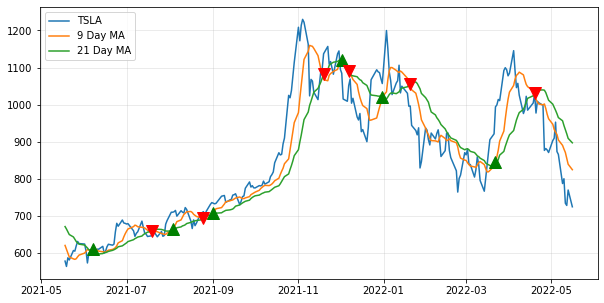

In [11]:
plt.rcParams['figure.figsize'] = 10,5
plt.grid(True, alpha = 0.3)
plt.plot(TSLA.iloc[-252:]['Close'],label = 'TSLA')
plt.plot(TSLA.iloc[-252:]['9-day'],label = '9 Day MA')
plt.plot(TSLA.iloc[-252:]['21-day'],label = '21 Day MA')
plt.plot(TSLA[-252:].loc[TSLA.entry == 2].index, TSLA[-252:]['9-day'][TSLA.entry == 2], '^', color = 'g', markersize = 12)
plt.plot(TSLA[-252:].loc[TSLA.entry == -2].index, TSLA[-252:]['21-day'][TSLA.entry == -2], 'v', color = 'r', markersize = 12)
plt.legend(loc=2)

# System vs Buy and Hold 

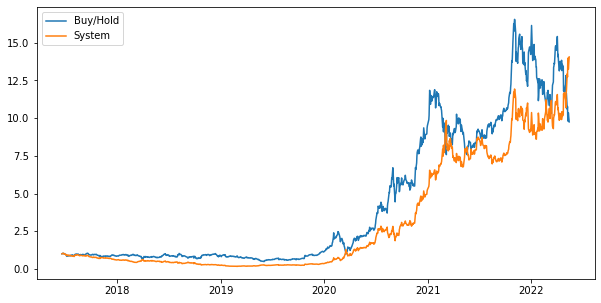

In [12]:
plt.plot(np.exp(TSLA['returns']).cumprod(),label='Buy/Hold')
plt.plot(np.exp(TSLA['system_return']).cumprod(),label='System')
plt.legend(loc=2)

In [13]:
np.exp(TSLA['returns']).cumprod()[-1] - 1

8.751884854891514

In [14]:
np.exp(TSLA['system_return']).cumprod()[-1] - 1

13.063025983227783